In [1]:
import os

import numpy as np
np.set_printoptions(precision=2)
import torch
import matplotlib.pyplot as plt

from bmadx import Particle
from bmadx.plot import plot_projections

from stats import (
    read_all_particles,
    show_cov_stats,
    plot_projections_with_contours
)

In [2]:
dr = os.path.join('data', 'non_gaussian_beam', 'stats_2')

In [3]:
gt = torch.load(os.path.join(dr, 'non_gaussian_beam.pt')).numpy_particles()

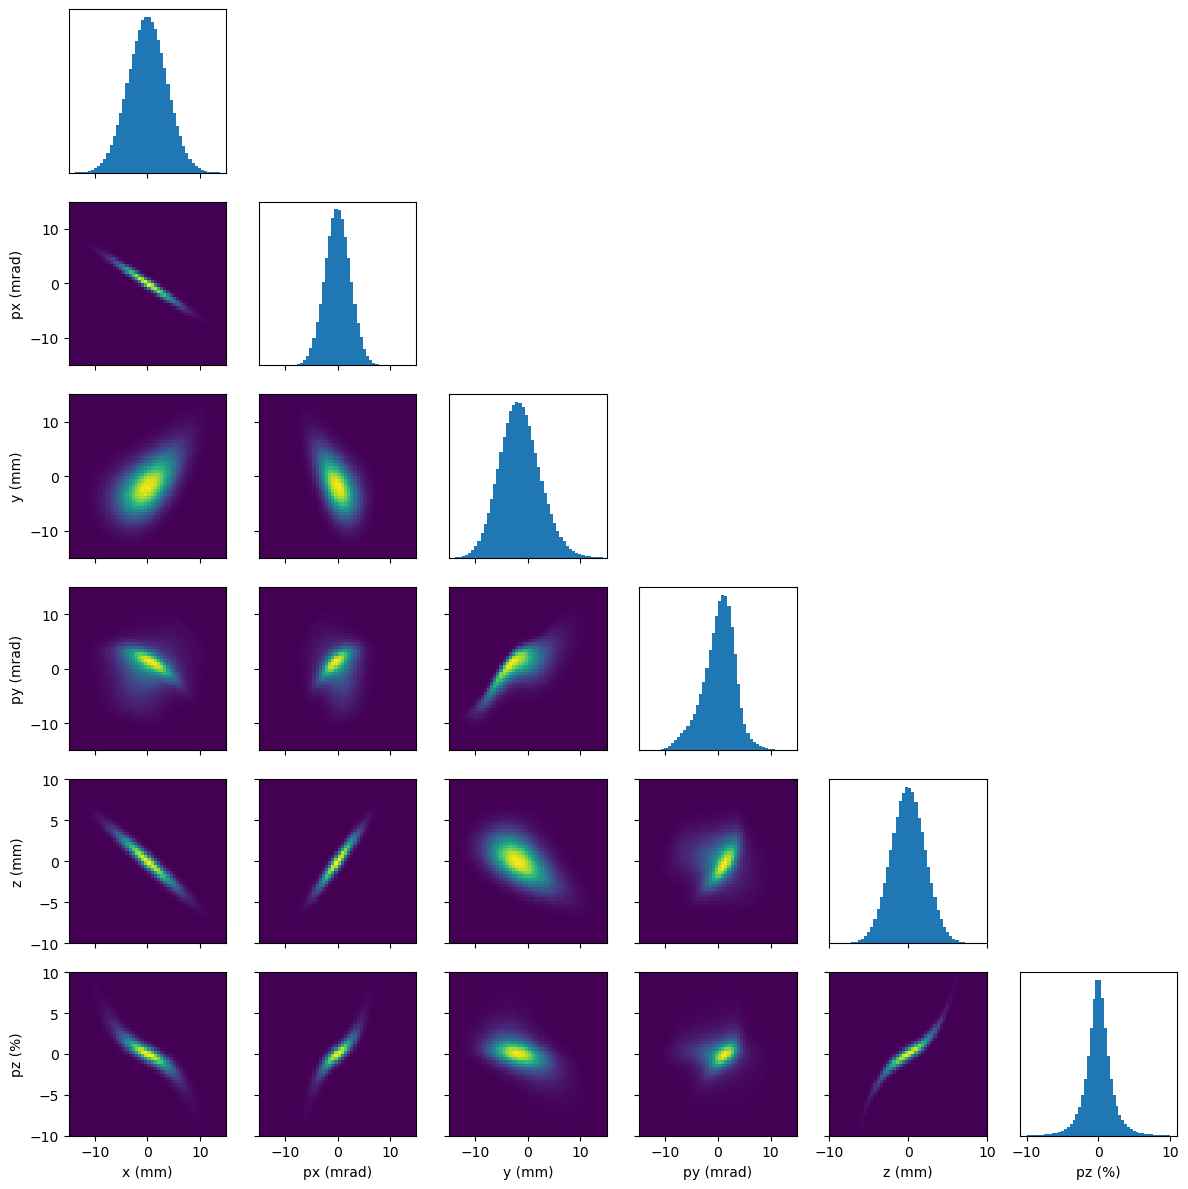

In [4]:
# plot gt:
lims = np.array([
    [-15e-3,15e-3],
    [-15e-3,15e-3],
    [-15e-3,15e-3],
    [-15e-3,15e-3],
    [-10e-3,10e-3],
    [-10e-2,10e-2]
])
plot_projections(gt, custom_lims=lims)
plt.show()

In [5]:
n_beams = 10
n_par = 100_000

pars = read_all_particles(
    dr = dr,
    n_beams = n_beams, 
    n_par = n_par
)

In [6]:
par_concat = np.swapaxes(pars, 0, 1).reshape((6, n_par*n_beams))

In [7]:
r_avg = Particle(
    *par_concat,
    p0c = gt.p0c,
    s = gt.s,
    mc2 = gt.mc2
)

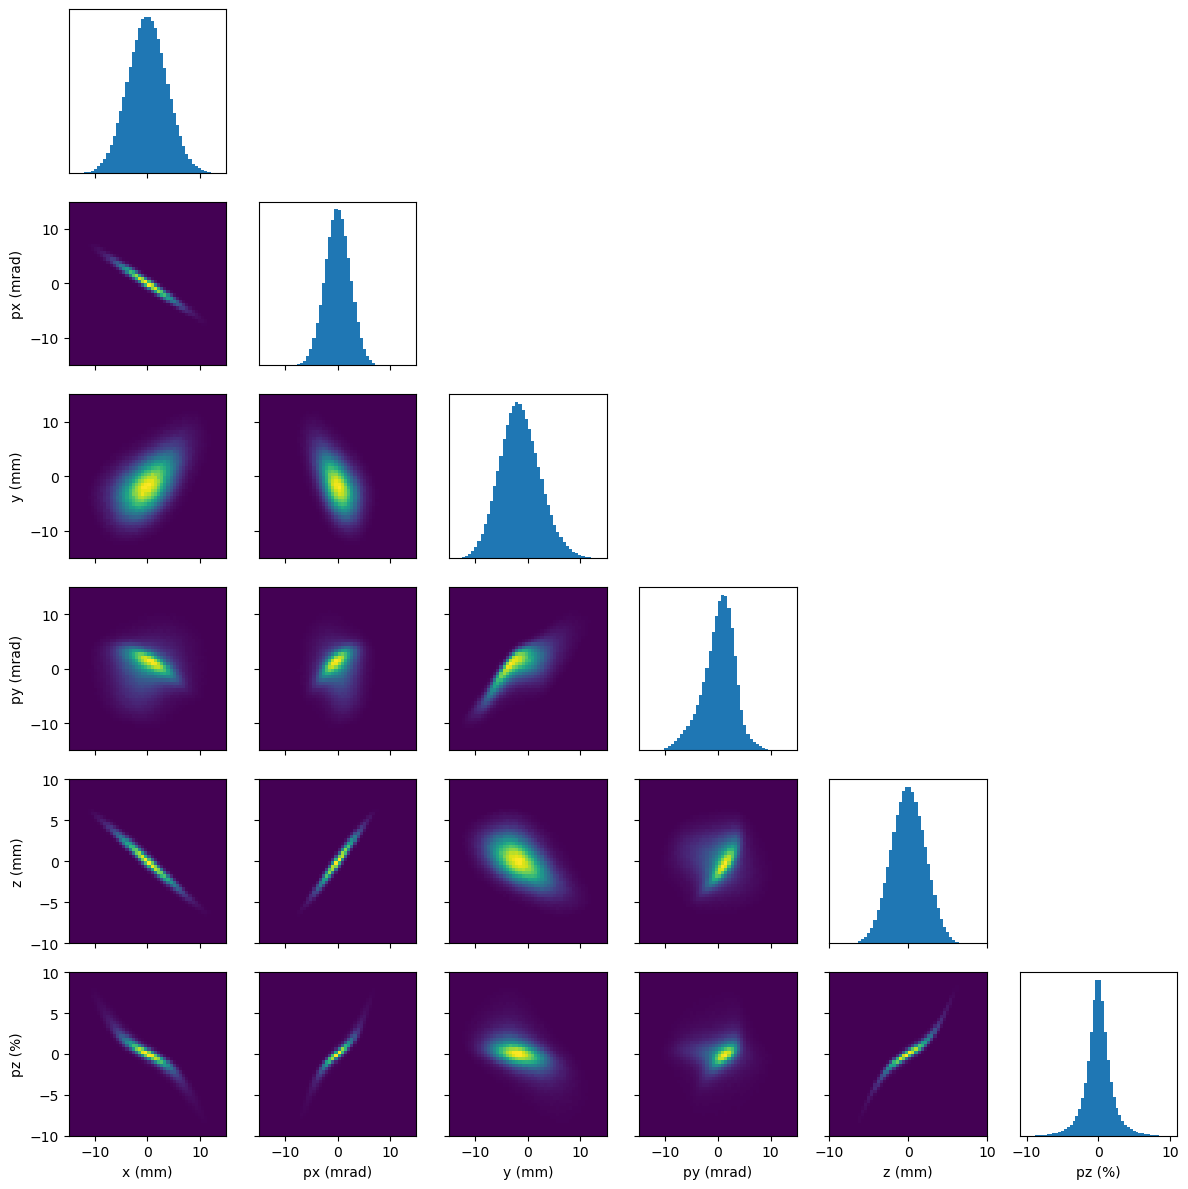

In [8]:
plot_projections(r_avg, custom_lims=lims)
plt.show()

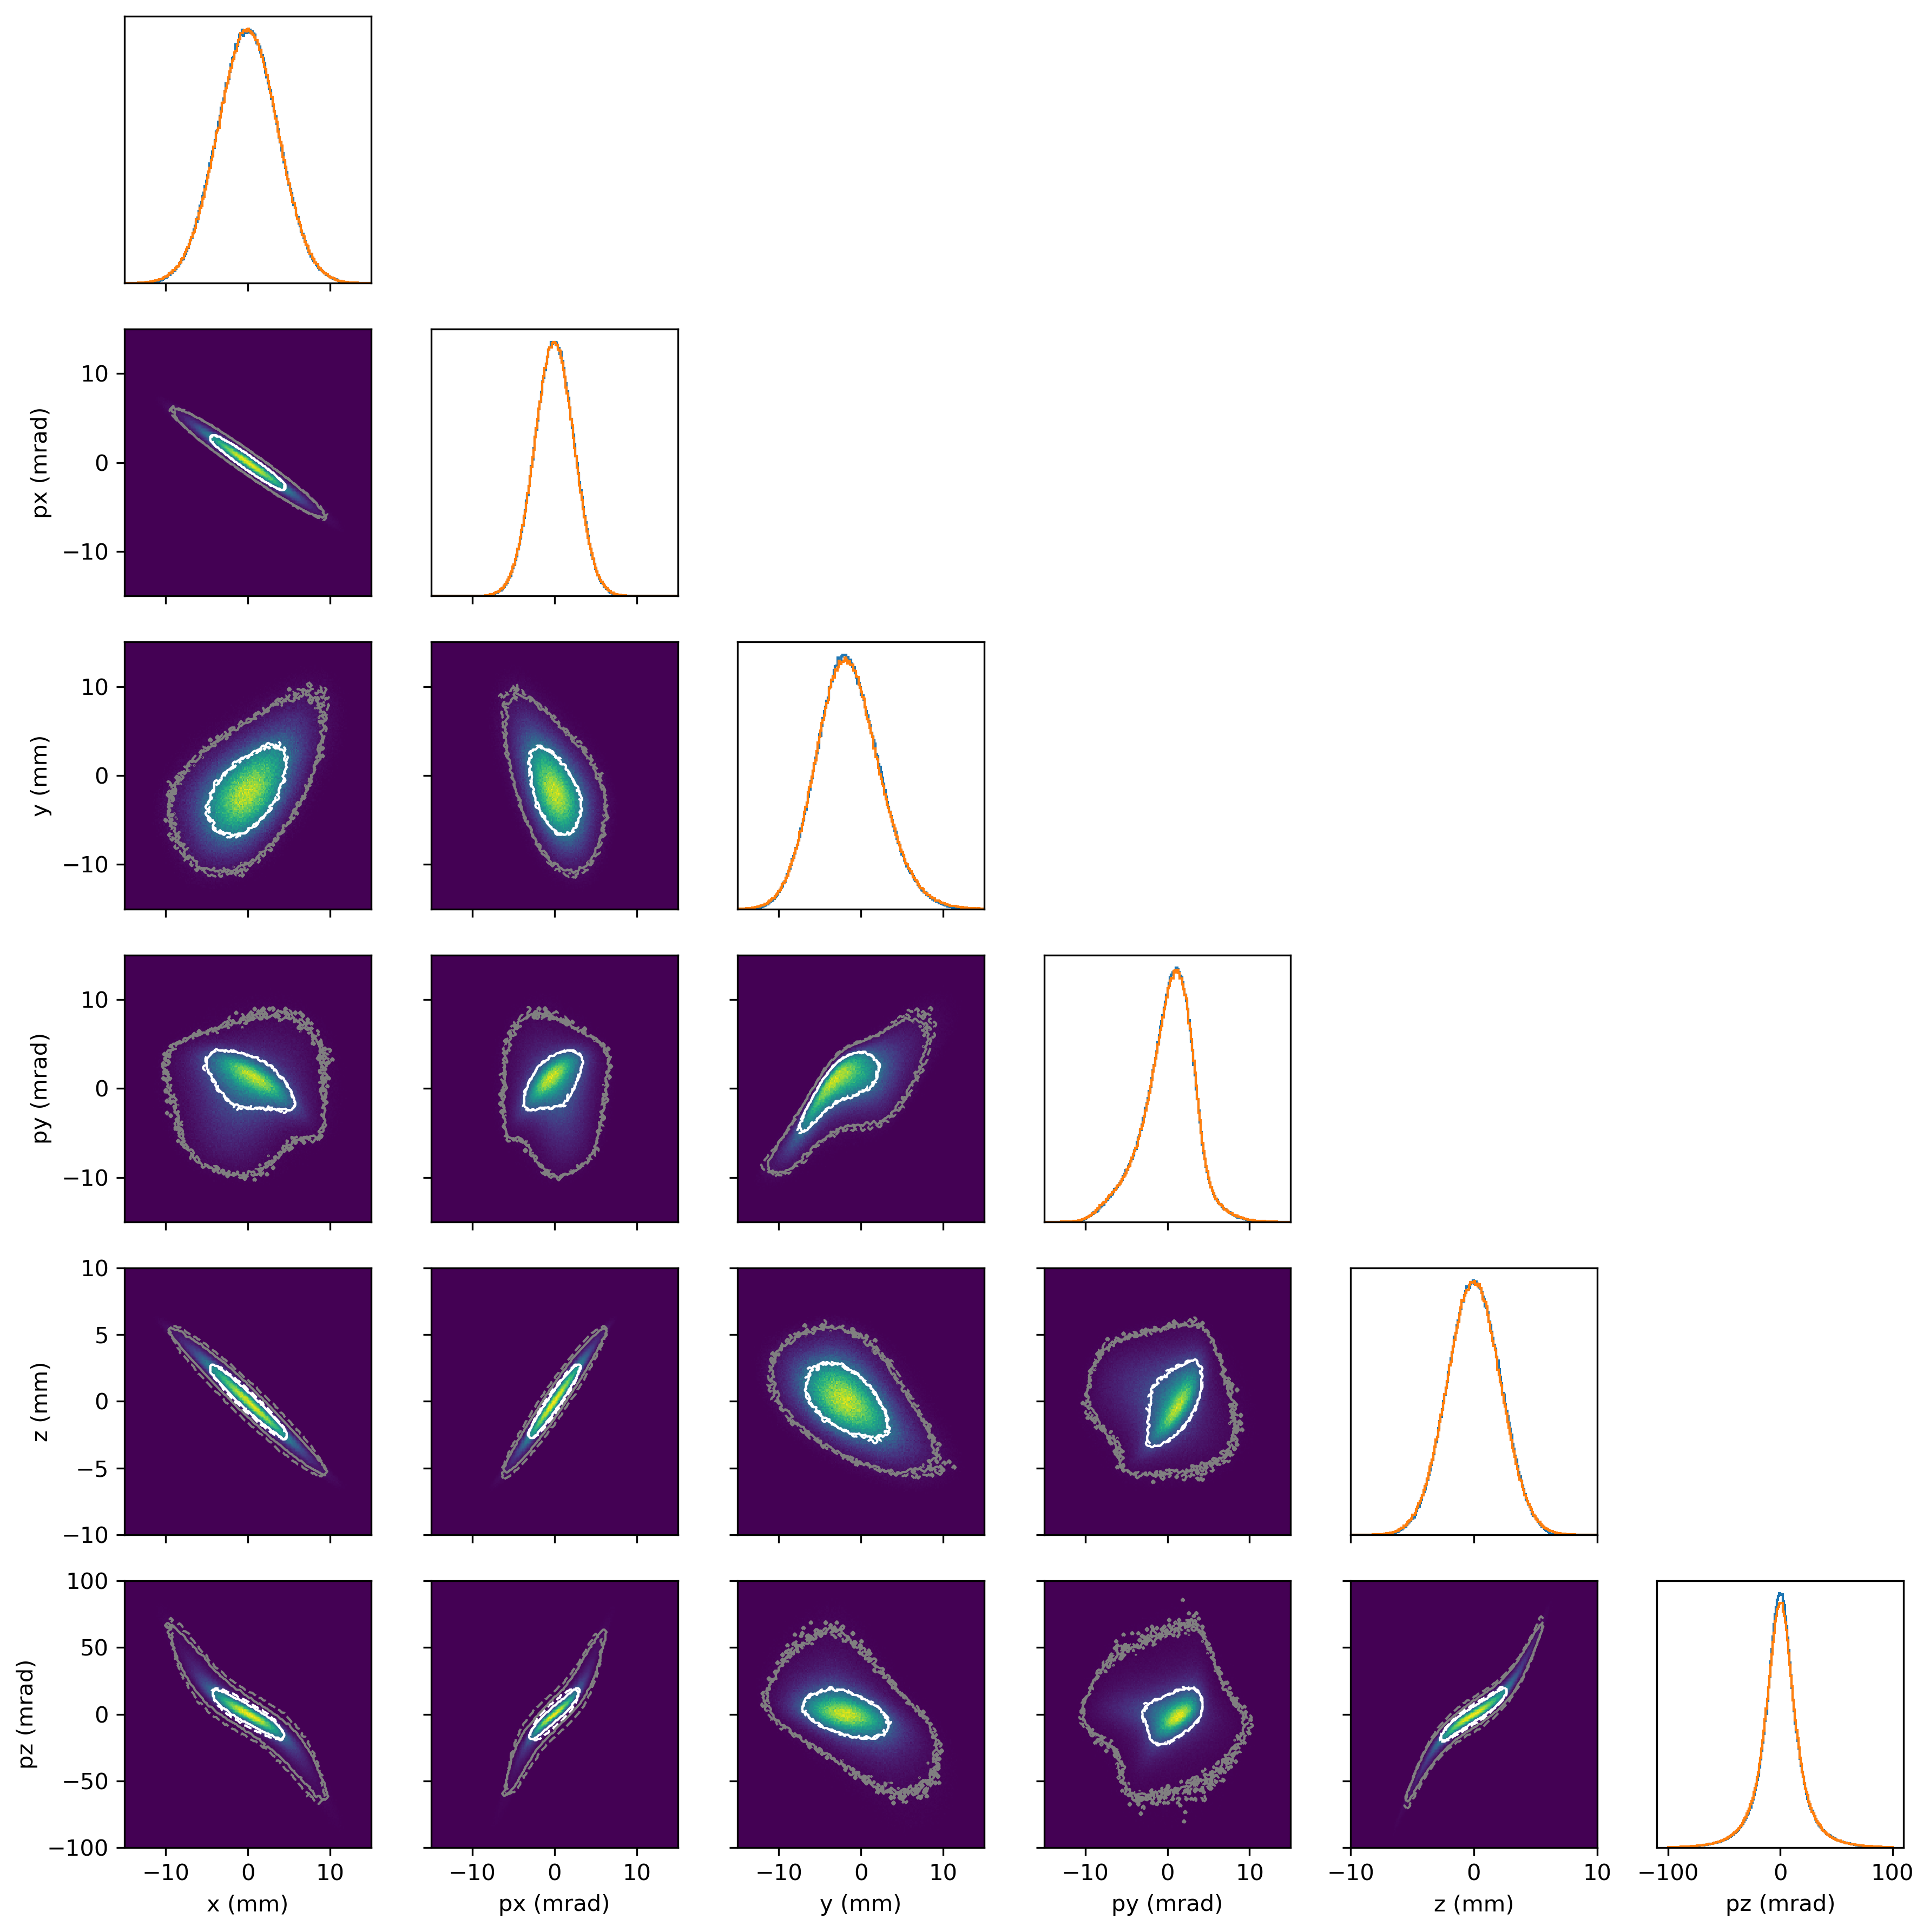

In [9]:
plot_projections_with_contours(
    r_avg,
    gt,
    bins=200,
    contour_percentiles = [50, 95],
    custom_lims=lims,
    contour_smoothing_r=0.5,
    contour_smoothing_gt=0.5
)
plt.show()

ground truth: 
[[ 10.96  -7.01   6.81  -0.54  -6.24 -49.76]
 [ -7.01   4.62  -4.37   0.34   4.04  32.25]
 [  6.81  -4.37  11.02   5.64  -3.93 -31.03]
 [ -0.54   0.34   5.64   6.02   0.31   2.71]
 [ -6.24   4.04  -3.93   0.31   3.74  29.88]
 [-49.76  32.25 -31.03   2.71  29.88 258.59]]

reconstruction avg: 
[[ 10.5   -6.72   6.25  -0.57  -6.01 -46.33]
 [ -6.72   4.44  -4.     0.37   3.9   30.41]
 [  6.25  -4.    10.68   5.62  -3.63 -27.46]
 [ -0.57   0.37   5.62   6.08   0.4    3.22]
 [ -6.01   3.9   -3.63   0.4    3.55  27.34]
 [-46.33  30.41 -27.46   3.22  27.34 222.1 ]]

reconstruction std: 
[[ 0.61  0.34  0.47  0.23  0.33  2.98]
 [ 0.34  0.19  0.3   0.12  0.19  1.64]
 [ 0.47  0.3   0.65  0.52  0.25  1.81]
 [ 0.23  0.12  0.52  0.38  0.14  1.06]
 [ 0.33  0.19  0.25  0.14  0.18  1.61]
 [ 2.98  1.64  1.81  1.06  1.61 16.02]]

reconstruction relative uncertainty: 
[[ 0.06 -0.05  0.08 -0.4  -0.06 -0.06]
 [-0.05  0.04 -0.07  0.32  0.05  0.05]
 [ 0.08 -0.07  0.06  0.09 -0.07 -0.07]
 [-0.4  

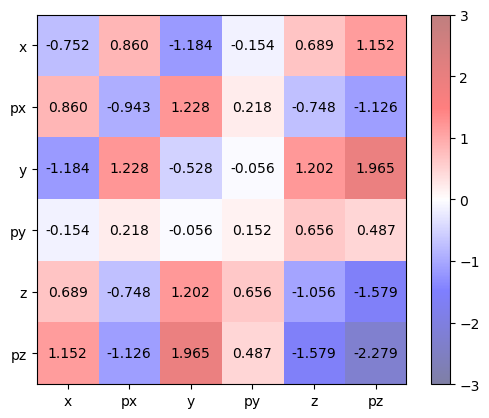

In [10]:
show_cov_stats(pars, gt, beam_fraction=0.5)

ground truth: 
[[ 12.02  -7.66   6.85  -0.71  -6.77 -55.52]
 [ -7.66   5.12  -4.39   0.46   4.41  36.11]
 [  6.85  -4.39  13.66   8.29  -3.94 -32.25]
 [ -0.71   0.46   8.29   9.12   0.41   3.34]
 [ -6.77   4.41  -3.94   0.41   4.12  33.83]
 [-55.52  36.11 -32.25   3.34  33.83 307.48]]

reconstruction avg: 
[[ 11.59  -7.39   6.36  -0.56  -6.6  -52.65]
 [ -7.39   4.94  -4.05   0.37   4.3   34.73]
 [  6.36  -4.05  13.31   8.24  -3.68 -29.1 ]
 [ -0.56   0.37   8.24   9.06   0.44   3.26]
 [ -6.6    4.3   -3.68   0.44   3.92  31.28]
 [-52.65  34.73 -29.1    3.26  31.28 267.51]]

reconstruction std: 
[[ 0.42  0.19  0.4   0.2   0.24  2.21]
 [ 0.19  0.09  0.28  0.11  0.12  1.08]
 [ 0.4   0.28  0.45  0.36  0.21  1.54]
 [ 0.2   0.11  0.36  0.25  0.15  1.07]
 [ 0.24  0.12  0.21  0.15  0.13  1.1 ]
 [ 2.21  1.08  1.54  1.07  1.1  13.19]]

reconstruction relative uncertainty: 
[[ 0.04 -0.03  0.06 -0.35 -0.04 -0.04]
 [-0.03  0.02 -0.07  0.29  0.03  0.03]
 [ 0.06 -0.07  0.03  0.04 -0.06 -0.05]
 [-0.35 

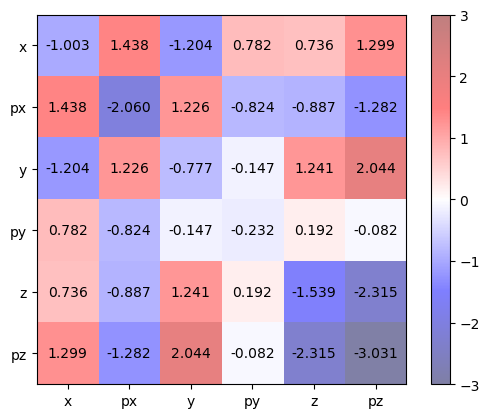

In [11]:
show_cov_stats(pars, gt, beam_fraction=0.95)

ground truth: 
[[ 13.56  -8.66   7.81  -0.57  -7.69 -69.25]
 [ -8.66   5.78  -5.02   0.37   5.    45.06]
 [  7.81  -5.02  15.11   9.07  -4.52 -40.69]
 [ -0.57   0.37   9.07   9.94   0.33   2.71]
 [ -7.69   5.    -4.52   0.33   4.69  42.25]
 [-69.25  45.06 -40.69   2.71  42.25 434.98]]

reconstruction avg: 
[[ 13.14  -8.39   7.18  -0.54  -7.51 -64.01]
 [ -8.39   5.6   -4.58   0.36   4.89  42.15]
 [  7.18  -4.58  14.18   8.62  -4.15 -35.22]
 [ -0.54   0.36   8.62   9.52   0.44   3.37]
 [ -7.51   4.89  -4.15   0.44   4.46  37.98]
 [-64.01  42.15 -35.22   3.37  37.98 350.41]]

reconstruction std: 
[[ 0.4   0.17  0.34  0.22  0.2   1.98]
 [ 0.17  0.07  0.23  0.12  0.1   0.98]
 [ 0.34  0.23  0.31  0.28  0.18  1.38]
 [ 0.22  0.12  0.28  0.2   0.16  1.22]
 [ 0.2   0.1   0.18  0.16  0.12  1.01]
 [ 1.98  0.98  1.38  1.22  1.01 12.19]]

reconstruction relative uncertainty: 
[[ 0.03 -0.02  0.05 -0.4  -0.03 -0.03]
 [-0.02  0.01 -0.05  0.32  0.02  0.02]
 [ 0.05 -0.05  0.02  0.03 -0.04 -0.04]
 [-0.4  

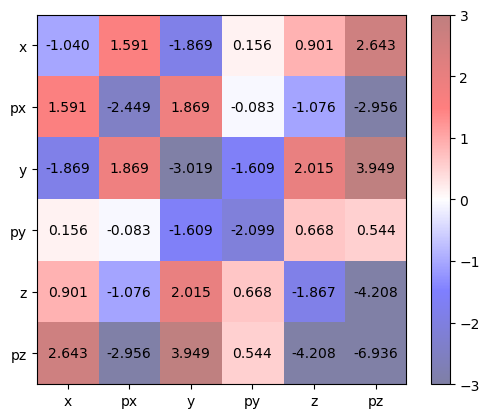

In [12]:
np.set_printoptions(precision=2, suppress=True)
show_cov_stats(pars, gt, beam_fraction=1.0)